# Data management

## Scraping the Internet to Collect Data

## [Malka Guillot](https://malkaguillot.github.io/)

## HEC Liège | [ECON2306]()

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/malkaguillot/ECON2206-Data-Management-2023/main?labpath=%2Fslides%2F3-data-collection.ipynb)

## Outline
1. Introduction
2. HTML: scraping and parsing
3. Web APIs

**Topics of this coding session**
- Gathering (unstructured) web data and transforming it into structured data (“web scraping”).
- Accessing data on the web: APIs.

## Intro

#### General interest references: 
-  Edelman, Benjamin. 2012. ["Using Internet Data for Economic Research."](https://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.26.2.189) Journal of Economic Perspectives, 26 (2): 189-206. 
-  Cavallo, Alberto, and Roberto Rigobon. 2016. ["The Billion Prices Project: Using Online Prices for Measurement and Research."](https://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.30.2.151) Journal of Economic Perspectives, 30 (2): 151-78. 

### Coding resources:
- [Python's requests & Beautiful Soup libraries](https://blog.hartleybrody.com/web-scraping-cheat-sheet/) (for web scraping & APIs)
- Ryan Mitchell, [Web Scraping with Python](https://learning.oreilly.com/library/view/web-scraping-with/9781491985564/), O'Reilly Media, 2018

### What is webscraping ?
<center>
<div class="r-stack"><img src="images/screenscraping.png" style="height: 400px;" > </div>
</center>

Source: [SICSS](https://compsocialscience.github.io) 

### What is Web Scraping?
- Process of **gathering information** from the Internet
    - structure or unstructured info
- Involves **automation** 

### Challenges of Web Scraping
- **Variety**. Every website is different.
- **Durability**. Websites constantly change.

### Points to keep in mind:
- It may or may not be legal
    - Loop at websites’ terms of service and robots.txt files
- Webscraping is tedious and frustrating

### Motivation

**Publication of crawling papers by year**

<center> 
    
<div class="r-stack"><img src="images/publication_crawling_papers_by_year.png" style="height: 400px;" > </div>
</center>

*Source*: Claussen, Jörg and Peukert, Christian, **[Obtaining Data from the Internet: A Guide to Data Crawling in Management Research](https://ssrn.com/abstract=3403799)** (June 2019). 


### Example of data

- **Online markets**: housing, job, goods
- **Social media**: Twitter, Facebook, Wechat, newspaper text
- **Historical data** using the internet Archives

### Getting started: Things to consider before you begin
- **What**  do you want ?
    - Is the website only online for a limited time? 
    - Do you want an original snapshot as a backup? 
    - Is it more convenient to filter your data offline?
- **How** do you want to proceed? 
    - What scraping approach (depends on the website)?
    - Which `python package` is needed? 

### Best practices

#### 1. Check out the data are already available 

- Send an **email** to try to get the data directly
- Search if somebody has already **faced the same or a similar problem**.
- Does the site or service provide an **API** that you can access directly?
    - An API or Application programming interface helps you get data you need via a simple computer program!

#### 2. Be gentle
- If possible, you can scrape during off-peak hours 
- Limit the number of parallel / concurrent requests
- Spread the requests across multiple IP's 
- Add delays to successive requests  
- Avoid unnecessary requests

#### 3. Respect `Robots.txt`

The `robot.txt` = a text file the website administrators create to instruct web scrapers on how to crawl pages on their website. 

$\rightarrow$ lays out the rules for acceptable behavior 
    - which web pages can and can't be scraped, 
    - which user agents are not allowed
    - how fast you can do it, 
    - how frequently you can do it

I'd also recommend you read the terms of service of the website. 

#### 4. Don't follow the same crawling pattern.

Even though human users and bots consume data from a web page, there are some differences:  

- Real Humans are slow & unpredictable, 
- Bots are fast but predictable. 

$\Rightarrow$ used by anti-scraping technologies to block web scraping.

*Solution*: incorporate some random actions that confuse the anti-scraping technology. 

### Most important python library for data collection
- Standard: 
    - `Requests`
    - `Beautiful Soup`
- More advanced
    - `Scrapy` [documentation](https://docs.scrapy.org/en/latest/)
    - `Selenium`

$+$ installing the package:

In [1]:
#pip install beautifulsoup4

### Load packages

In [1]:
# Import packages + set options
from IPython.display import display
import json

import pandas as pd
pd.options.display.max_columns = None # Display all columns of a dataframe
pd.options.display.max_rows = 700

from pprint import pprint
import re  

### Data communication for the World Wide Web 

- `HTTP protocol`= way of communication between the client (browser) and the web server 
    - no encryption $\rightarrow$ not safe
- `HTTPS protocol`= S for secured

$\Rightarrow $ works by doing `Requests` and `Responses`

### Static vs. dynamic websites 
![](https://about.gitlab.com/images/blogimages/ssg-gitlab-pages-series/part-1-dynamic-x-static-server.png)

Notes: 
- **Static Websites**: the server that hosts the site sends back HTML documents that already contain all the data you’ll get to see as a user.

### Request and Response

all interactions between a client and a web server are split into a request and a response:

- `Requests` contain relevant data regarding your request call:
    - base URL 
        - \[ More on this for **API**: the *endpoint*, the *method* used, the *headers*, and so on.\]
- `Responses` contain relevant data returned by the server:
    - the data or content, the status code, and the headers.

In [3]:
import requests
url='https://ballotpedia.org/List_of_current_members_of_the_U.S._Congress'
response = requests.get(url)
response

<Response [200]>

### `Request`'s attributes

In [4]:
request = response.request
print('request: ',request)
print('-----')
print('url: ',request.url)
print('-----')  
print('path_url: ', request.path_url)
print('-----')
print('Method: ', request.method)
print('-----')
print('Method: ', request.headers)

request:  <PreparedRequest [GET]>
-----
url:  https://ballotpedia.org/List_of_current_members_of_the_U.S._Congress
-----
path_url:  /List_of_current_members_of_the_U.S._Congress
-----
Method:  GET
-----
Method:  {'User-Agent': 'python-requests/2.27.1', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}


### `Response`'s attributes

- `.text` returns the response contents in Unicode format
- `.content` returns the response contents in bytes.

In [5]:
print('', response)
print('-----')
print('Text:', response.text[:50]) # Only the first 50 characters
print('-----')
print('Status_code:', response.status_code)
print('-----')
print('hHeaders:', response.headers)

 <Response [200]>
-----
Text: <!-- here -->
<!DOCTYPE html>
<html class="client-
-----
Status_code: 200
-----
hHeaders: {'Date': 'Wed, 02 Mar 2022 17:33:08 GMT', 'Content-Type': 'text/html; charset=UTF-8', 'Content-Length': '41673', 'Connection': 'keep-alive', 'Server': 'Apache/2.4.51 () OpenSSL/1.0.2k-fips', 'X-Content-Type-Options': 'nosniff', 'Content-language': 'en', 'Vary': 'Accept-Encoding,Cookie', 'Expires': 'Thu, 01 Jan 1970 00:00:00 GMT', 'Pragma': 'no-cache', 'X-Request-Id': 'Yh-nhyOIT71oZ0LX9MRRmQAAAJg', 'Content-Encoding': 'gzip', 'Cache-Control': 'public', 'X-Cacheable': 'YES', 'X-Varnish': '435304487 463060960', 'Age': '717', 'Via': '1.1 varnish-v4', 'Strict-Transport-Security': 'max-age=31536000', 'X-Cache-Expires': 'Thu, 01 Jan 1970 00:00:00 GMT', 'X-Cache': 'HIT', 'X-Cache-Hits': '18', 'Accept-Ranges': 'bytes'}


### Status Codes

**Important information**: 
if your request was successful, if it’s missing data, if it’s missing credentials

<center>    
<div class="r-stack"><img src="https://www.whatismyip.com/images/https-codes.png" style="height: 400px;" > </div>
</center>

## Scraping & Parsing in Practice

### STEPS:
1. Inspect Your Data Source
1.  Scrape HTML Content From a Page
1.  Parse HTML Code With Beautiful Soup

## Step 1: Inspect Your Data Source

### Explore the Website 

**Objective**: understanding its underlying structure

*We will scrape the list of current members of the U.S. Congress*

### Website example for today

 
<center>
<div class="r-stack"><img src="images/ballotpedia.png" style="height: 400px;" > </div>
</center>

Source: [ballotpedia website](https://ballotpedia.org/List_of_current_members_of_the_U.S._Congress) 


### Understanding URLs
- **Base URL**: https://ballotpedia.org/List_of_current_members_of_the_U.S._Congress
- More complex URL with query parameter https://ballotpedia.org/wiki/index.php?search=jerry
    - query parameter=`p?search=jerry`
    - can be used to crawl websites if you have a list of queries that you want to loop over (e.g. dates, localities...)
    - query structure:
        - *Start*: `?`
        - *Information*: pieces of information constituting one query parameter are encoded in key-value pairs, where related keys and values are joined together by an equals sign (key=value). 
        - *Separator*: `&` -> if multiple query parameters 
        
Other example of URL: https://opendata.swiss/en/dataset?political_level=commune&q=health. 

<div class="alert alert-info">
<h3> Your turn</h3>
<p> Try to change the search and selection parameters and observe how that affects your URL. 
<p>   Next, try to change the values directly in your URL. See what happens when you paste the following URL into your browser’s address bar:
</div>

**Conclusion**: When you explore URLs, you can get information on how to retrieve data from the website’s server.

### Inspect the site: Using Developer Tools
We use the `inspect` function (right click) to access the underlying HTML interactively. 

<center>
<div class="r-stack"><img src="images/ballotpedia_inspect.png" style="height: 400px;" > </div>
</center>


### Developer tools
- Developer tools can help you understand the structure of a website
- I use it in chrome or firefox, but exists for most browsers
- Interactively explore the source html & the webpage

**`html` is great but intricated $\Rightarrow$ sublimed by `beautifulsoup`** 

##  Step 2: Scrape HTML Content From a Page

In [6]:
import requests
url='https://ballotpedia.org/List_of_current_members_of_the_U.S._Congress'
response = requests.get(url)
html=response.text
html[:500]

'<!-- here -->\n<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>List of current members of the U.S. Congress - Ballotpedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequest'

html looks messy.

Using the `prettify()` function from `BeautifulSoup` helps

In [7]:
# Parse raw HTML
from bs4 import BeautifulSoup # package for parsing HTML
soup = BeautifulSoup(html, 'html.parser') # parse html of web page
print(soup.prettify()[:1000])

<!-- here -->
<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of current members of the U.S. Congress - Ballotpedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"Yh-nhyOIT71oZ0LX9MRRmQAAAJg","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_current_members_of_the_U.S._Congress","wgTitle":"List of current members of the U.S. Congress","wgCurRevisionId":8587985,"wgRevisionId":8587985,"wgArticleId":180048,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Unique congress pages","One-off pages, active"],"wgPageC

##  Step 3: Parse HTML Code With Beautiful Soup

**Objectif**: extract url of senators from the webpage to build a list of url that will be used for scraping info on senators

### Find Elements by ID using `find`

In an HTML web page, every element can have an id attribute assigned. 

Can be used to directly access the element. 

**Syntax**: 
- `soup.find(id='the-id-of-what-you-are-looking for')`
- Output: some text

In [8]:
balance=soup.find(id='Leadership_and_partisan_balance')
print(balance.prettify()[:500])

<span class="mw-headline" id="Leadership_and_partisan_balance">
 Leadership and partisan balance
</span>


<div class="alert alert-info">
<h3> Your turn</h3>
<p> Find the id & get the soup for the table entitled *List of current U.S. Senate members*. 
</div>

In [9]:
officeholder_table=soup.find(id='officeholder-table')
print(officeholder_table.prettify()[:500])

<table class="bptable gray sortable" id="officeholder-table" style="width:auto; border-bottom:1px solid #bcbcbc;">
 <thead>
  <tr colspan="4" style="background:#4c4c4c!important;color:#fff!important;text-align:center;padding: 7px 8px 8px;margin-bottom:4px;">
   <th>
    Office
   </th>
   <th>
    Name
   </th>
   <th>
    Party
   </th>
   <th>
    Date assumed office
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td style="padding-left:10px;">
    <a href="https://ballotpedia.org/List_of_Unite


### Find Elements by HTML Class Name (using `find_all`)
Because the result is not unique `find_all` instead of `find`. 

Lets' rely on the html structure to find the row of the table

**Syntax**: 
- `soup.find_all(id='the-id-of-what-you-are-looking for')`
- Output: a list

In [10]:
thead= officeholder_table.find('thead')
thead

<thead>
<tr colspan="4" style="background:#4c4c4c!important;color:#fff!important;text-align:center;padding: 7px 8px 8px;margin-bottom:4px;">
<th>Office</th>
<th>Name</th>
<th>Party</th>
<th>Date assumed office</th>
</tr>
</thead>

In [11]:
rows=officeholder_table.find_all('tr')
len(rows) # consistent: 100 members + headline + 2 delegations from puerto rico

103

### Find Elements by CSS Class using `select_one()` or  `find_all()`

In an HTML web page, some tag can contain a "class" attribute. 

It can be useful if you want to get information from a tag which has no id attribute:

`\<table class="bptable gray sortable jquery-tablesorter" id="officeholder-table" style="width:auto; border-bottom:1px solid #bcbcbc;">`

Note that this table tag has **4 classes**: 
- bptable, 
- gray, 
- sortable 
- jquery-tablesorter. 

In this case you can use any of the three first class name to get the `officeholder_table`:

#### First syntax:  `select_one(tag_name.class_name)` 
You can select multiple elements with `select()`.

In [12]:
officeholder_table = soup.select_one('table.bptable')
print(officeholder_table.prettify()[:300])

<table class="bptable gray sortable" id="officeholder-table" style="width:auto; border-bottom:1px solid #bcbcbc;">
 <thead>
  <tr colspan="4" style="background:#4c4c4c!important;color:#fff!important;text-align:center;padding: 7px 8px 8px;margin-bottom:4px;">
   <th>
    Office
   </th>
   <th>
    N


#### Second syntax: `find(tag_name, {'attribute_name' : 'attribute_value'})`
You can select multiple elements with `find_all()`.

In [13]:
officeholder_table = soup.find('table', {'class' : 'bptable'})
print(officeholder_table.prettify()[:300])

<table class="bptable gray sortable" id="officeholder-table" style="width:auto; border-bottom:1px solid #bcbcbc;">
 <thead>
  <tr colspan="4" style="background:#4c4c4c!important;color:#fff!important;text-align:center;padding: 7px 8px 8px;margin-bottom:4px;">
   <th>
    Office
   </th>
   <th>
    N


### Let's try to get the `url` for one example row:
We will use the `html tag`

In [14]:
row=rows[1]
row

<tr>
<td style="padding-left:10px;"><a href="https://ballotpedia.org/List_of_United_States_Senators_from_Alabama">U.S. Senate Alabama</a></td>
<td style="padding-left:10px;text-align:center;"><a href="https://ballotpedia.org/Richard_Shelby">Richard Shelby</a></td>
<td class="partytd Republican">Republican </td>
<td style="text-align:center;">January 3, 1987</td>
</tr>

In [15]:
tds=row.find_all('td')
tds[:4]

[<td style="padding-left:10px;"><a href="https://ballotpedia.org/List_of_United_States_Senators_from_Alabama">U.S. Senate Alabama</a></td>,
 <td style="padding-left:10px;text-align:center;"><a href="https://ballotpedia.org/Richard_Shelby">Richard Shelby</a></td>,
 <td class="partytd Republican">Republican </td>,
 <td style="text-align:center;">January 3, 1987</td>]

In [16]:
url= tds[1].find_all('a') 
print('--')
print('a list:', url)
print('--')
print('its unique element', url[0])
print('--')
print('url wanted', url[0]['href'] )
print('--')
print('Text content', url[0].get_text())

--
a list: [<a href="https://ballotpedia.org/Richard_Shelby">Richard Shelby</a>]
--
its unique element <a href="https://ballotpedia.org/Richard_Shelby">Richard Shelby</a>
--
url wanted https://ballotpedia.org/Richard_Shelby
--
Text content Richard Shelby


<div class="alert alert-info">
<h3> Your turn</h3>
<p> Use the code for 1 row in order to build a loop that gives a list of all of the wanted url. 
</div>

In [17]:
list_url=[]
for row in rows[1:]:
    tds=row.find_all('td')
    url= tds[1].find_all('a')[0]['href']    
    list_url.append(url)
list_url[:10]

['https://ballotpedia.org/Richard_Shelby',
 'https://ballotpedia.org/Tommy_Tuberville',
 'https://ballotpedia.org/Lisa_Murkowski',
 'https://ballotpedia.org/Daniel_S._Sullivan',
 'https://ballotpedia.org/Mark_Kelly',
 'https://ballotpedia.org/Kyrsten_Sinema',
 'https://ballotpedia.org/John_Boozman',
 'https://ballotpedia.org/Tom_Cotton',
 'https://ballotpedia.org/Dianne_Feinstein',
 'https://ballotpedia.org/Alex_Padilla']

## Your First Scraper

Then, the same logic can be implemented to get the info from the senators' page (e.g. https://ballotpedia.org/Jerry_Moran). The following code extracts info from the first 10 url from the list scraped above. 

### Strategy

- Loop of a list of url (`list_url`)
    - get the soup for the `url` $\rightarrow$ `get_the_soup()`
        - Extract information from the `soup`


In [18]:
#1. Get the soup
def get_the_soup(url):
    '''
    Requests the URL and cooks it into a soup object. 
    ---
    Arguments: url
    Returns: soup
    '''
    
    response = requests.get(url)
    html=response.text
    soup = BeautifulSoup(html, 'html.parser') # parse html of web page
    return soup

In [19]:
url = list_url[2]
soup=get_the_soup(url)
soup

<!-- here -->
<!-- here -->
<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Lisa Murkowski - Ballotpedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"Yh-qFYH0K71q4yAM2KRjewAAAAg","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Lisa_Murkowski","wgTitle":"Lisa Murkowski","wgCurRevisionId":8672006,"wgRevisionId":8672006,"wgArticleId":179591,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["U.S. Senate candidate, 2022","U.S. Senate candidates","Alaska","Republican Party","2022 incumbent","2022 potential candidate","2012 endorsement of Mi

In [20]:
#2. Extract info from the soup
from bs4 import NavigableString, Tag

def extract_soup_info_to_dictionary(soup):
    '''
    Extracts relevant information from a bs4 object and stores it into a dictionary by html header. 
    ---
    Arguments: soup
    Returns: dictionary of text (value) by header (key)
    '''
    
    dic_text_by_header=dict()
    
    # get all the text content between 2 header (h2)
    for header in soup.find_all('h2')[0:len(soup.find_all('h2'))-1] :
        # print('--------',header.get_text())        
        nextNode=header
        # use the nextSibling method
        while True:
            nextNode=nextNode.nextSibling
            if nextNode is None:
                break
            if isinstance(nextNode, Tag):
                if nextNode.name == "h2":
                    break
                #print(nextNode.get_text(strip=True).strip())
                # The result is put in a dictionary as a value for key=corresponding header
                dic_text_by_header[header.get_text()]=[nextNode.get_text(strip=True).strip()]
    
    return dic_text_by_header

In [21]:
extract_soup_info_to_dictionary(soup)

{'Contents': [''],
 'Career': ['2002-Present: U.S. Senator from Alaska2002: Appointed to U.S. Senate1999-2002:Alaska House of Representatives1989-1996: Private practice1987-1989: Anchorage District Court attorney1985: Graduated from Willamette College of Law1980: Graduated from Georgetown University'],
 'Committee assignments': ['AppropriationsSubcommittee on Commerce, Justice, Science, and Related AgenciesSubcommittee on DefenseSubcommittee on Energy And Water DevelopmentSubcommittee on Homeland SecuritySubcommittee on Interior, Environment, and Related Agencies,Ranking MemberSubcommittee on Military Construction, Veterans Affairs, and Related AgenciesEnergy and Natural Resources,Ranking MemberSubcommittee on Water and PowerHealth, Education, Labor, and PensionsSubcommittee on Primary Health and AgingIndian Affairs'],
 'Key votes': ['!function(d,s,id){var js,fjs=d.getElementsByTagName(s)[0],p=/^https:/.test(d.location)?\'https\':\'http\';if(!d.getElementById(id)){js=d.createElement(s)

#### Putting everything together

- A dataframe to put things together: `df_parsed`


- **LOOP**: `url` from `list_url`): 

    - `get_the_soup()`: 
        - `url`  -> `soup`

    - `extract_soup_info_to_dictionary()`: 
        - `soup` -> `dic_text_by_header`
        
    - `pd.concat()`
        - `dic_text_by_header` -> `df_parsed`

#### `pd.concat()`? 
Powerfull method to combine data:

In [22]:
df1 = pd.DataFrame([['a', 1], ['b', 2]], columns=['letter', 'number'])
df1

,letter,number
0,a,1
1,b,2


In [23]:
df2 = pd.DataFrame([['c', 3], ['d', 4]], columns=['letter', 'number'])
df2

,letter,number
0,c,3
1,d,4


#### `pd.concat(list-of-dataframes)` 
Vertical or horizontal concatenation

In [24]:
pd.concat([df1, df2], axis=0) # axis = 0 -> along the index, the default

,letter,number
0,a,1
1,b,2
0,c,3
1,d,4


In [25]:
pd.concat([df1, df2], axis=1) # axis = 1 -> ON the index

,letter,number,letter,number
0,a,1,c,3
1,b,2,d,4


#### The LOOP over `list_url` using our homemade functions:

In [26]:
from bs4 import NavigableString, Tag

# the dataframe in which we will put the scraper's output
df_parsed=pd.DataFrame()

for url in list_url[:10]:
    print('--------',url, '--------')
    #1. Get the soup
    soup = get_the_soup(url)
    
    #2. Extract info from the soup
    dic_text_by_header=extract_soup_info_to_dictionary(soup)
                
    # put the dictionary into a dataframe
    temp=pd.DataFrame.from_dict(dic_text_by_header)

    # Concats the temporary dataframe with the global one
    df_parsed=pd.concat([temp, df_parsed])

-------- https://ballotpedia.org/Richard_Shelby --------
-------- https://ballotpedia.org/Tommy_Tuberville --------
-------- https://ballotpedia.org/Lisa_Murkowski --------


KeyboardInterrupt: 

In [27]:
df_parsed.head()

,Contents,Biography,Committee assignments,Elections,Campaign themes,Noteworthy events,See also,External links,Footnotes,Career,Key votes,Issues,Campaign donors,Personal Gain Index,Analysis,Recent news
0,,"Tommy Tuberville was born in Camden, Arkansas,...",,,,,,CandidateU.S. Senate AlabamaWebsiteFacebookTwi...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,,"Shelby was born inBirmingham, Alabama. He gra...","AppropriationsSubcommittee on Commerce, Justic...",,NaN,NaN,United States SenateUnited States Senate elect...,OfficeholderU.S. Senate AlabamaWebsiteFacebook...,v•eStateofAlabamaMontgomery(capital)ElectionsW...,1987-Present: U.S. Senator from Alabama1994: S...,,"On August 9, 2014, U.S. District JudgeMark Ful...",,Richard Shelby Campaign ContributionsTotal Rai...,,Richard Shelby News Feed


### Saving the `DataFrame` in a `pickle` format

<div class="alert alert-block alert-warning">
<i class="fa fa-warning"></i>&nbsp;<code>pickle</code> format
    <ul>
        <li> Useful to store <code>python</code> objects 
        </li>
        <li> Well integrated in  <code>pandas</code> (using <code>to_pickle</code> and <code>read_pickle</code>)
        </li>
        <li> When the object is not a pandas Dataframe, use the <code>pickle</code> package
        </li>
    </ul>
</div>


#### Managing path
<div class="alert alert-block alert-warning">
<i class="fa fa-warning"></i>&nbsp;<code>os</code> package
    <ul>
        <li> <code>os.getcwd()</code>: fetchs the current path
        </li>
        <li> <code>os.path.dirname()</code>: go back to the parent directory
        </li>
        <li> <code>os.path.join()</code>: concatenates several paths
        </li>
    </ul>
</div>

In [28]:
import os

os.getcwd()

'/Users/malka/dox/econ2306-dm/lectures'

In [29]:
parent_path=os.path.dirname(os.getcwd()) 
parent_path

'/Users/malka/dox/econ2306-dm'

In [30]:
data_path=os.path.join(parent_path, 'data') 

# Saving the data to pickle:
df_parsed.to_pickle(os.path.join(data_path, 'df_senators.pickle'))

# Saving the data to csv:
df_parsed.to_csv(os.path.join(data_path, 'df_senators.csv'))

### Going further

There are also **dynamic websites**: the server does not always send back HTML, but your browser also receive and interpret JavaScript code that you cannot retreive from the HTML. You receive JavaScript code that you cannot parse using `beautiful soup` but that you would need to execute like a browser does. 

Solutions: 
- Use `requests-html` 
- Simulate a browser using [selenium](https://selenium-python.readthedocs.io/) 

# Application Programming Interfaces (API)

### What is an API?

Communication layer that allows different systems to talk to each other without having to understand exactly what each other does.

$\Rightarrow$ provide a to **progammable** access to data.

The website [Programmable Web](https://www.programmableweb.com/apis/directory) lists more than 225,353 API from sites as diverse as Google, Amazon, YouTube, the New York Times, del.icio.us, LinkedIn, and many others.

<center>
<div class="r-stack"><img src="https://www.programmableweb.com/sites/default/files/2019-06-total-apis-since-2005.png" style="height: 400px;" > </div>
</center>

Source: [Programmable Web](https://www.programmableweb.com/news/apis-show-faster-growth-rate-2019-previous-years/research/2019/07/17) 


### How Does an API Work?

- Relying on **HTTP messages** :
    - `request` for information or data, 
    - the API returns a `response` with what you requested
- Similar to visiting a website: you specify a URL and information is sent to your machine.

###  Better than webscraping if possible because: 
- More stable than webpages
- No HTML but already structured data (e.g. in `json`)
- we focus on the APIs that use HTTP protocol

<center>
<img src="https://s3.us-west-1.wasabisys.com/idbwmedia.com/images/api/restapi_restapi.svg">
</center>

### HTTP Methods
| HTTP Method | Description                  | Requests method   |
|-------------|------------------------------|-------------------|
| POST        | Create a new resource.       | requests.post()   |
| GET         | Read an existing resource.   | requests.get()    |
| PUT         | Update an existing resource. | requests.put()    |
| DELETE      | Delete an existing resource. | requests.delete() |

## Calling Your First API Using Python

Forecasts from the [**Carbon Intensity API**](https://carbonintensity.org.uk/) (include CO2 emissions related to eletricity generation only).

See the API [documentation](https://carbon-intensity.github.io/api-definitions/#carbon-intensity-api-v2-0-0)

<center>
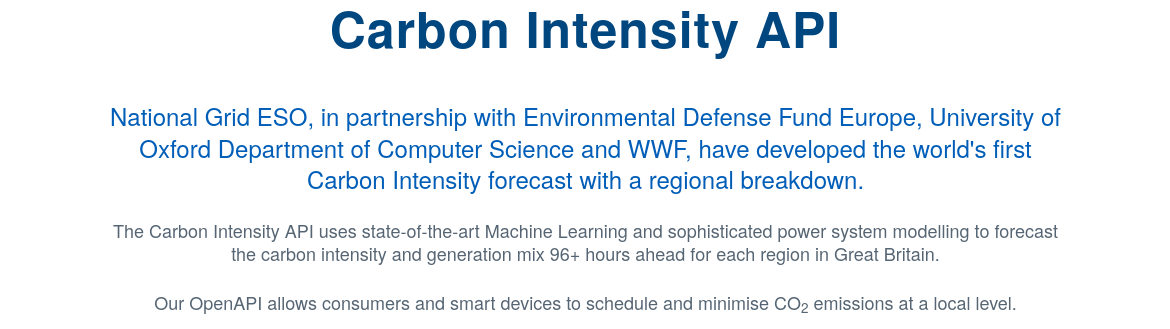
</center>


In [31]:
import requests
headers = { 
  'Accept': 'application/json'
}
# fetch (or get) data from the URL
requests.get('https://api.carbonintensity.org.uk', params={}, headers = headers) 

<Response [200]>

In [32]:
response = requests.get('https://api.carbonintensity.org.uk', params={}, headers = headers) 
print(response.text[:500])

<!DOCTYPE html>
<html lang="en">
  <head>
    <title>Carbon Intensity API</title>
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width, initial-scale=1">
    <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap.min.css">
    <script src="https://ajax.googleapis.com/ajax/libs/jquery/3.2.1/jquery.min.js"></script>
    <script src="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/js/bootstrap.min.js"></script>
    <style>
  


### Endpoints and Resources
- **base URL**: https://api.carbonintensity.org.uk
    - Other examples: https://api.twitter.com; https://api.github.com
    - very basic information about an API, not the real data.
- Extend the url with **endpoint**
    - = a part of the URL that specifies what resource you want to fetch
    - check the [documentation](https://carbon-intensity.github.io/api-definitions/#carbon-intensity-api-v2-0-0)
 to learn more about what endpoints are available

### Using the `intensity`  endpoint:

In [33]:
# Get Carbon Intensity data for current half hour
r = requests.get('https://api.carbonintensity.org.uk/intensity', params={}, headers = headers)

# Different outputs (same information):
print("--- text ---")
pprint(r.text)
print("--- Content ---")
pprint(r.content)
print("--- JSON---")
pprint(r.json())

--- text ---
('{ \r\n'
 '  "data":[{ \r\n'
 '    "from": "2022-03-02T17:00Z",\r\n'
 '    "to": "2022-03-02T17:30Z",\r\n'
 '    "intensity": {\r\n'
 '      "forecast": 194,\r\n'
 '      "actual": 202,\r\n'
 '      "index": "moderate"\r\n'
 '    }\r\n'
 '  }]\r\n'
 '}')
--- Content ---
(b'{ \r\n  "data":[{ \r\n    "from": "2022-03-02T17:00Z",\r\n    "to": "2022-'
 b'03-02T17:30Z",\r\n    "intensity": {\r\n      "forecast": 194,\r\n      "a'
 b'ctual": 202,\r\n      "index": "moderate"\r\n    }\r\n  }]\r\n}')
--- JSON---
{'data': [{'from': '2022-03-02T17:00Z',
           'intensity': {'actual': 202, 'forecast': 194, 'index': 'moderate'},
           'to': '2022-03-02T17:30Z'}]}


<div class="alert alert-block alert-warning">
<h2><i class="fa fa-warning"></i><code>json</code> </h2>
    <ul>
        <li><code>json</code>= python dictionary
        </li>
        <li>A great format for structured data
        </li>
    </ul>
</div>

In [34]:
# json objects work as do any other dictionary in Python
json=r.json()
json['data']

[{'from': '2022-03-02T17:00Z',
  'to': '2022-03-02T17:30Z',
  'intensity': {'forecast': 194, 'actual': 202, 'index': 'moderate'}}]

In [35]:
# get the actual intensity value:
json['data'][0]['intensity']['actual']

202

<div class="alert alert-info">
<h3> Your turn</h3>
        <li>Get Carbon Intensity factors for each fuel type -> look for the relevant endpoint
        </li>
        <li> Get Carbon Intensity data for current half hour for GB regions
        </li>
    </ul>

</div>

In [36]:
r = requests.get('https://api.carbonintensity.org.uk/intensity/factors', params={}, headers = headers)
pprint(r.json())

{'data': [{'Biomass': 120,
           'Coal': 937,
           'Dutch Imports': 474,
           'French Imports': 53,
           'Gas (Combined Cycle)': 394,
           'Gas (Open Cycle)': 651,
           'Hydro': 0,
           'Irish Imports': 458,
           'Nuclear': 0,
           'Oil': 935,
           'Other': 300,
           'Pumped Storage': 0,
           'Solar': 0,
           'Wind': 0}]}


In [37]:
# Get Carbon Intensity data for current half hour for GB regions
r = requests.get('https://api.carbonintensity.org.uk/regional', params={}, headers = headers)
#pprint(r.json())

### Query Parameters
- cf. slide on `url`
- used as filters you can send with your API request to further narrow down the responses.

In [38]:
# In the carbonintensity API, it works differently:
from_="2018-08-25T12:35Z"
to="2018-08-25T13:35Z"
r = requests.get('https://api.carbonintensity.org.uk/regional/intensity/{}/{}'.format(from_, to), params={}, headers = headers)
#pprint(r.json())

## API Limitations
To prevent collection of huge amount of individual data, many APIs require you to obtain “credentials” or codes/passwords that identify you and determine which types of data you are allowed to access. 

### API Credentials
- Different methods/level of authentification exist
    - API keys
    - OAuth
      
###  Rate Limiting
- The credentials also define how often we are allowed to make requests for data. 
- Be careful not to exceed the limits set by the API developers. 

### API Keys

- Most common level of authentication 
- These keys are used to identify you as an API user or customer and to trace your use of the API. 
- API keys are typically sent as a request header or as a query parameter.


### Example of API key authentification using the nasa API!!!

In [39]:
endpoint = "https://api.nasa.gov/mars-photos/api/v1/rovers/perseverance/photos"
# Replace DEMO_KEY below with your own key if you generated one.
api_key = "DEMO_KEY"
# You can add the API key to your request by appending the api_key= query parameter:
query_params = {"api_key": api_key, "earth_date": "2021-02-27"}
response = requests.get(endpoint, params=query_params)
response

<Response [200]>

Authentification was a success!

In [40]:
response.json()
photos = response.json()["photos"]
print(f"Found {len(photos)} photos")
photos[50]["img_src"]

Found 239 photos


'https://mars.nasa.gov/mars2020-raw-images/pub/ods/surface/sol/00009/ids/edr/browse/ncam/NLE_0009_0667755063_497ECM_N0030000NCAM00102_02_0LLJ01_1200.jpg'

<center>
<img src="https://mars.nasa.gov/mars2020-raw-images/pub/ods/surface/sol/00009/ids/edr/browse/ncam/NRF_0009_0667756352_693ECM_N0030000NCAM05000_01_295J01_1200.jpg">
</center>

### More from Perseverance!

[List](https://github.com/chrisccerami/mars-photo-api#cameras) of the different camera of perseverance. 

[Web application](https://mars-photos.herokuapp.com/)

## General remarks
- Start simple
    - Expand your program incrementally.
- Keep it simple. 
    - Do not overengineer the problem.
- Do not repeat yourself. 
    - Code duplication implies bug reuse.
- Limit the number of iterations for test runs. 
    - Use print statements toinspect objects.
- Write tests to verify things work as intended.
- If the web page cannot be navigated easily or has hidden javascript, look into Selenium.